# Chapter 2. Mathematical Plotting with Matplotlib

The main user interface of Matplotlib is the `matplotlib.pyplot` package, which, by convention, is imported under the `plt` alias.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib implements a lightweight TeX expression parser and layout engine and [Mathtext](https://matplotlib.org/stable/users/explain/text/mathtext.html) is the subset of Tex markup that this engine supports.

- TeX does not need to be installed to use Mathtext because Matplotlib ships with the Mathtext parser and engine.
- The Mathtext layout engine is a fairly direct adaptation of the layout algorithms in Donald Knuth's TeX.

## Basic plotting

Most commonly, the data that you wish to plot will be store in two separate NumPy arrays, which will labal `x` and `y` for clarity. We will

- generate an array of `x` values, and
- use a function to generate the corresponding `y` values

$$
f(x) = x(x-2) e^{3-x}
$$

In [2]:
def f(x):
    return x*(x-2)*np.exp(3-x)

We need to create a set of the `x` values that cover the desired range. The `linspace` routine from NumPy is ideal for creating arrays of numbers for plotting. By default, it will create 50 equally spaced points between the specified arguments. 50 is sufficient for most cases.

In [3]:
x = np.linspace(-0.5, 3.0)
assert x[ 0] == -0.5
assert x[ 7] == 0.0
assert x[14] == 0.5
assert x[21] == 1.0
assert x[28] == 1.5
assert x[35] == 2.0
assert x[42] == 2.5
assert x[49] == 3.0

Once we have created the `x` values, we can generate the `y` values:

In [4]:
y = f(x)
assert y[ 7] == 0
assert np.isclose(y[21], -np.power(np.e, 2))
assert y[35] == 0
assert y[49] == 3

Call the `plot` routine from Matplotlib package to plot the data. The first argument is the `x` data and the second is the `y` data.

> Plotting interactively within a Jupyter notebook can be done with the `%matplotlib inline` command, which will lead to static images of your plot embedded in the notebook.

> The semicolon at the end of the last line is intentional; it suppresses the textual representation of the plot from the output.

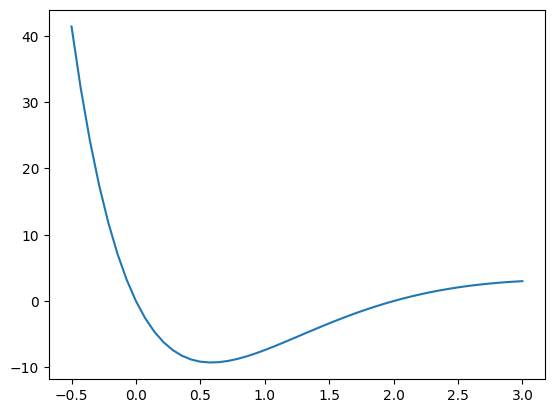

In [5]:
%matplotlib inline
plt.plot(x, y);

If there are currently no `Figure` or `Axes` objects, the `plt.plt` routine creates a new `Figure` object, adds a new `Axes` object to the figure, and populates this `Axes` object wit the plotted data.

The `pyplot.subplots` routine creates a new `Figure` object and explicitly creates a new set of axes in the figure together:

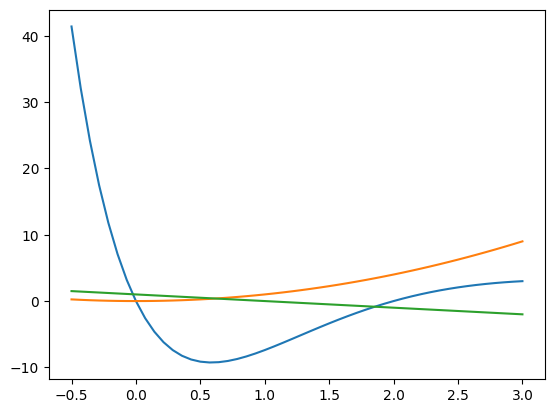

In [6]:
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.plot(x, x**2)
ax.plot(x, 1-x);

## Changing the plotting style

When calling `plt.plot`, we can specify the marker style but omit the line style, which means that no connecting line is drawn between adjacent data points. This is useful for plotting discrete data where no interpolation between points is necessary.

For the purposes of this demonstration, we will define the following data:

In [7]:
y1 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y2 = np.array([1.2, 1.6, 3.1, 4.2, 4.8])
y3 = np.array([3.2, 1.1, 2.0, 4.9, 2.5])

Then create a new figure and plot the data on the figure:

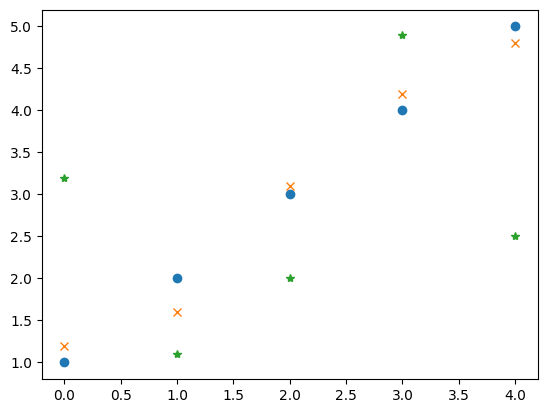

In [8]:
fig, ax = plt.subplots()
ax.plot(y1, 'o')
ax.plot(y2, 'x')
ax.plot(y3, '*');

Note that as the `x` data is not given to the `plot` calls, the points are plotted against their position in the array, that is, the `x` coordinate will be 0, 1, 2, 3, or 4, respectively, for each array.

The strings `'o'`, `'x'` and `'*'` in the `plot` calls are the [format strings](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). A format string consists of a part of color, marker and line:

```
fmt = '[marker][line][color]'
```

The `plot` method also accepts a number of keyword arguments that can also be used to control the style of a plot. Keyword arguments take precedence over format string parameters if both are present, and they apply to all sets of data plotted by the call.

- `marker`
- `linestyle` or `ls`
- `color` or `c`
- `linewidth` or `lw`

## Figures, Axes, and Line2D

Let's review the [`pyplot.subplots` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

```python
fig, ax  = plt.subplots()       # a single Axes object
fig, ax4 = plt.subplots(2,2)    # an array of Axes objects
```

The method returns

- a single `Figure` object, and
- a single `Axes` object or an array of `Axes` objects

You can put plots in an `Axes` object with the `Axes.plot` method: 

```python
ax.plot(y1, 'o')
ax.plot(y2, 'x')
ax.plot(y3, '*')
```

The [Figure class](https://matplotlib.org/stable/api/figure_api.html) is the top level container for all the plot elements.

- adding axes and sub-figures
- saving the figure to a file
- annotating
  - color bar
  - legend
  - text
  - super title
  - super x-label and y-label
- figure geometry
  - size, height & width
  - dots per inch
- subplot layout
  - the position of the left/right/top/bottom edge
  - the width/height of the padding between sub-plots
- modifying appearance
  - the figure's background patch
  - the line width of the figure rectangle
  - the face/edge color of the figure rectangle

The [Axes class](https://matplotlib.org/stable/api/axes_api.html) represents one (sub-)plot in a figure. It contains the plotted data, axis ticks, labels, title, legend, etc. Its methods are the main interface for manipulating the plot.

- axis / limits
  - axis limits and direction
  - axis labels, title, and legend
  - axis scales
  - auto-scaling and margins
  - aspect ratio
  - ticks and tick labels
- plotting
  - spans
  - spectral
  - statistics
  - binned
  - contours
  - 2D arrays
  - unstructured triangles
  - text and annotations
  - vector fields

The `Axes.plot` method returns a list of the [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) objects. Each `Line2D` object represents the dataset plotted by the call.

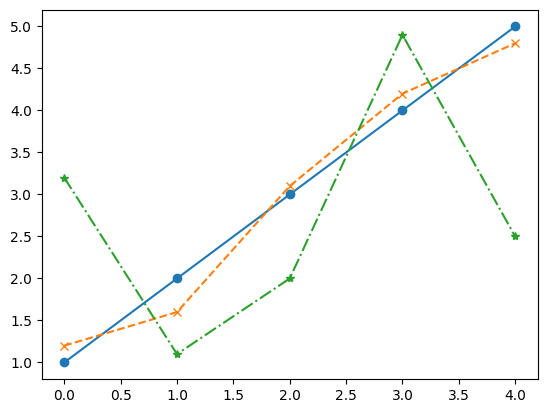

In [9]:
fig, ax = plt.subplots()

line1, = ax.plot(y1, "o-")   # expecting a single-element list
xdata1, ydata1 = line1.get_data()
assert np.array_equal(xdata1, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata1, [1.0, 2.0, 3.0, 4.0, 5.0])

lines = ax.plot(y2, "x--", y3, "*-.")
assert len(lines) == 2
xdata2, ydata2 = lines[0].get_data()
assert np.array_equal(xdata2, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata2, [1.2, 1.6, 3.1, 4.2, 4.8])
xdata3, ydata3 = lines[1].get_data()
assert np.array_equal(xdata3, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata3, [3.2, 1.1, 2.0, 4.9, 2.5])

## Labels and legends

Every plot should have a title, and the axes should be properly labeled. For plots displaying multiple sets of data, legends are a good way to help the reader quickly identify the marker, the line, and the color of different datasets.

When you have plotted two ore more datasets, call the [Axes.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) method with an iterable of strings, one for each legend item.

```python
fig, ax = plt.subplots()
ax.plot(y1, "o-", y2, "x--", y3, "*-.")
ax.set_title("Plot of the data y1, y2, and y3")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
ax.legend(("data y1", "data y2", "data y3"))
```

When you have plotted each dataset, call the `Axes.legend` method with a iterable of the `Line2D` objects. The labels of legend items are taken from the `label` property of the `Line2D` object.

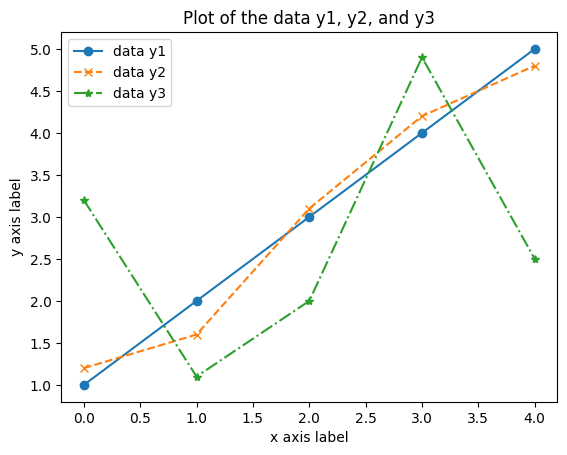

In [10]:
fig, ax = plt.subplots()
line1, = ax.plot(y1, "o-", label="data y1")
line2, = ax.plot(y2, "x--", label="data y2")
line3, = ax.plot(y3, "*-.", label="data y3")
ax.set_title("Plot of the data y1, y2, and y3")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
ax.legend(handles=[line1, line2, line3]);

The [Axes class](https://matplotlib.org/stable/api/axes_api.html) contains the plotted data, axis ticks, labels, title, legend, etc. Its methods are the main interface for manipulating the plot.

## Subplots

Occasionally, it is useful to place multiple related plots within the same figure side by side but not on the same axes. Subplots allow us to produce a grid of individual plots within a single figure.

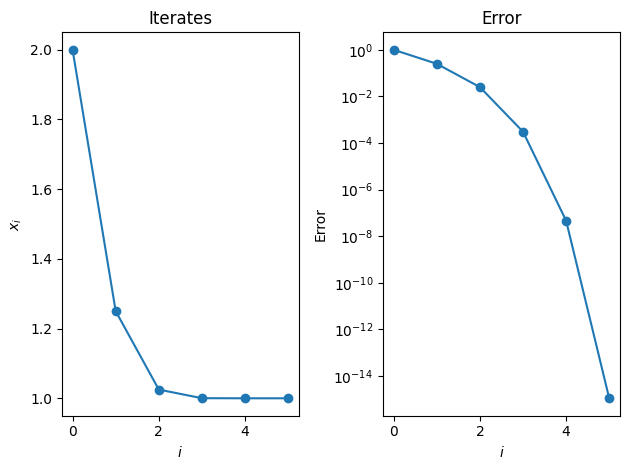

In [11]:
def generate_newton_iters(x0, number):
    iterates = [x0]
    errors = [abs(x0 - 1.)]
    for _ in range(number):
        x0 = x0 - (x0*x0 - 1.)/(2*x0)
        iterates.append(x0)
        errors.append(abs(x0 - 1.))
    return iterates, errors

iterates, errors = generate_newton_iters(2., 5)

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)

ax1.plot(iterates, "o-")
ax1.set_title("Iterates")
ax1.set_xlabel(r"$i$")
ax1.set_ylabel(r"$x_i$")

ax2.semilogy(errors, "o-")
ax2.set_title("Error")
ax2.set_xlabel(r"$i$")
ax2.set_ylabel("Error");

The error values are plotted on the right.

- The `Axes.semilogy` method uses a logarithmic scale on the y-axis. The signature of this method is the same as the standard `plot` method.
- We can also aplot with a logarithmic scale for x-axis only by using the `Axes.semilogx` method, or both axes on a logarithmic scale by using the `loglog` method.

The `plt.subplots` routine does several things; it

- creates a new `Figure` object of a certain size
- creates a *grid with specified shape* in the figure area
- adds a new `Axes` object to each position of the grid

then returns the `Figure` object and one or more `Axes` object;
- if a single subplot is requested (`plt.subplots()` for one row and one column), then a plain `Axes` object is returned
- if a single row or column is requested (e.g., `plt.subplots(1,2)` for one row and two columns), then a list of the `Axes` object is returned
- if more than one row and column is requested (e.g., `plt.subplots(2,3)` for two rows and three columns), then a list of lists, with rows represented by inner lists filled with the `Axes` objects, will be returned

```python
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax11,ax12,ax13),(ax21,ax22,ax23)) = plt.subplots(2,3)
```

## Surface and contour plots

Two common choices for displaying three-dimensional data are by using *surface plots* and *contour plots*. To plot three-dimensional data, it needs to be arranged into two-dimensional arrays for the $x$, $y$, and $z$ components, where both the $x$ and $y$ components must be of the same shape as the $z$ component.

[N-D domains](https://numpy.org/doc/stable/user/how-to-partition.html#n-d-domains) can be partitioned into grids. You can create a rectangular grid out of a set of one-dimensional coordinate arrays with `numpy.meshgrid`.

Given two one-dimensional arrays, `numpy.meshgrid` will create two coordinate arrays, which can be used to generate the coordinate pairs determining this grid. For example, let $X$ be the $x$ coordinate array and $Y$ the $y$ coordinate.

$$
\begin{aligned}
X = \text{np.array}([x_1, x_2, \cdots, x_n]) \\
Y = \text{np.array}([y_1, y_2, \cdots, y_m])
\end{aligned}
$$

Invoking `x, y = np.meshgrid(X, Y)` produces two coordinate arrays:

$$
x =
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n \\
x_1 & x_2 & \cdots & x_n \\
\vdots & \vdots & \ddots & \vdots \\
x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\quad
y =
\begin{bmatrix}
y_1 & y_1 & \cdots & y_1 \\
y_2 & y_2 & \cdots & y_2 \\
\vdots & \vdots & \ddots & \vdots \\
y_m & y_m & \cdots & y_m
\end{bmatrix}
$$

Then $x \circ y$ evaluates

$$
x \circ y =
\begin{bmatrix}
x_1 \circ y_1 & x_2 \circ y_1 & \cdots & x_n \circ y_1 \\
x_1 \circ y_2 & x_2 \circ y_2 & \cdots & x_n \circ y_2 \\
\vdots & \vdots & \ddots & \vdots \\
x_1 \circ y_2 & x_2 \circ y_2 & \cdots & x_n \circ y_m
\end{bmatrix}
$$

In [12]:
X = np.array([-2., -1., 0., 1., 2.])
Y = np.array([     -1., 0., 1.    ])
x, y = np.meshgrid(X, Y)

In [13]:
x

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [14]:
y

array([[-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [15]:
x * y

array([[ 2.,  1., -0., -1., -2.],
       [-0., -0.,  0.,  0.,  0.],
       [-2., -1.,  0.,  1.,  2.]])

Now, we want to plot the following function to the $-2 \leq x \leq 2$ and $-1 \leq y \leq 1$ range:

$$
f(x,y) = x^2 y^3
$$

In [16]:
X = np.linspace(-2, 2)
Y = np.linspace(-1, 1)
x, y = np.meshgrid(X, Y)
z = x**2 * y**3

A 3D surface plot in Matplotlib is a visual representation of multiple points connected like a graph with a specific area in three-dimensional space.

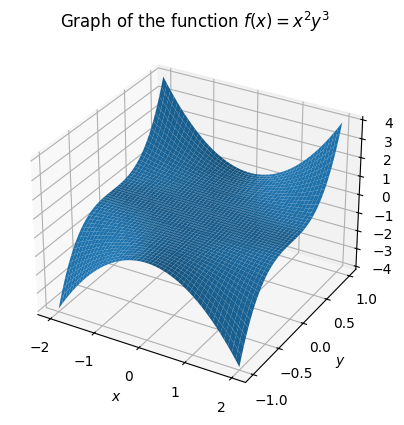

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$x^2 y^3$")
ax.set_title(r"Graph of the function $f(x) = x^2 y^3$");

A contour plot, also known as a contour map or a level plot, is a graphical representation of a three-dimensional surface on a two-dimensional plane.

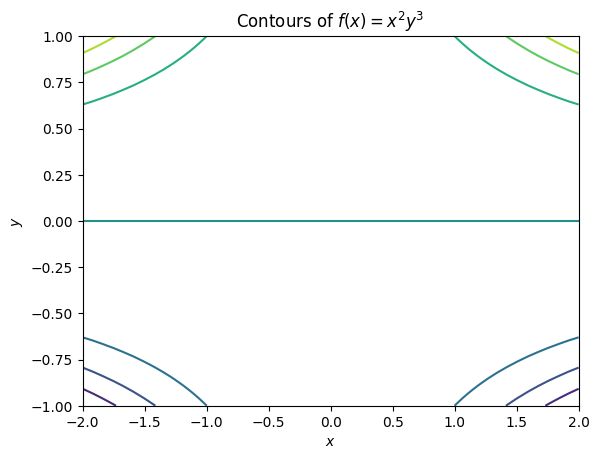

In [18]:
fig, ax = plt.subplots()
ax.contour(x, y, z)

ax.set_title(r"Contours of $f(x) = x^2 y^3$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$");

The Matplotlib provides an `Axes3D` object, which is a three-dimensional version of the `Axes` object. This is made available to the `axes` method on a `Figure` object when the `projection="3d"` keyword argument is given.

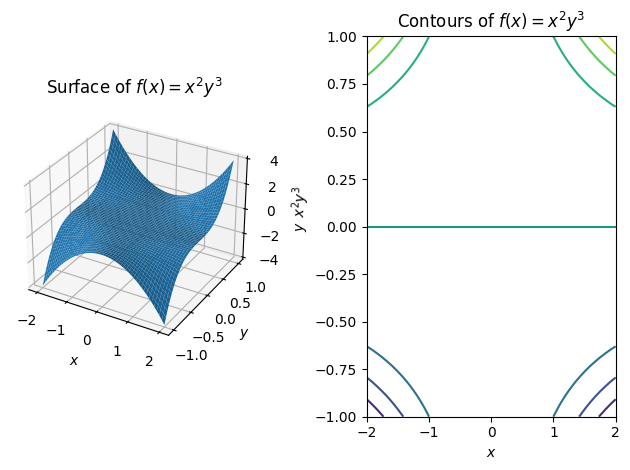

In [19]:
fig = plt.figure(tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_title(r"Surface of $f(x) = x^2 y^3$")
ax1.plot_surface(x, y, z)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.set_zlabel(r"$x^2 y^3$")

ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(x, y, z)
ax2.set_title(r"Contours of $f(x) = x^2 y^3$")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$");

The routines described above only work with highly structured data where the $x$, $y$, and $z$ components are arranged into grids. Unfortunately, real-life data is rarely so structured. In this case, you need to perform some kind of interpolation between known points to approximate the value on a uniform grid, which can then be plotted. A common method for performing this interpolation is by triangulating the collection of $(x, y)$ pairs and then using the values of the function on the vertices of each triangle to estimate the value on the grid points.

Fortunately, Matplotlib has a method that does all of these steps and then plots the result, which is the `plot_trisurf` and `tricontour` routines.

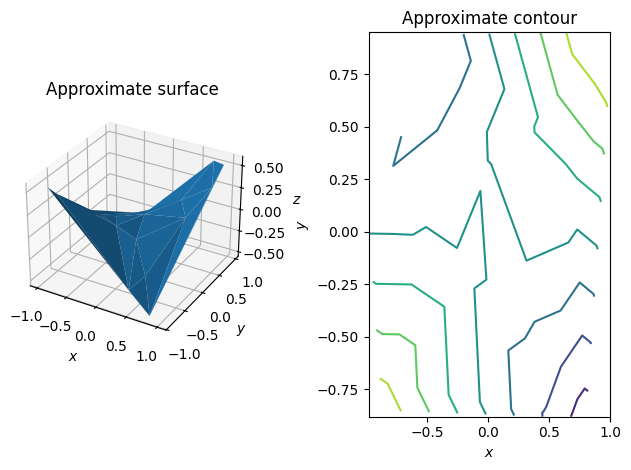

In [20]:
x = np.array([ 0.19, -0.82, 0.8 , 0.95, 0.46, 0.71, 
     -0.86, -0.55,   0.75,-0.98, 0.55, -0.17, -0.89,
         -0.4 , 0.48, -0.09, 1., -0.03, -0.87, -0.43])
y = np.array([-0.25, -0.71, -0.88, 0.55, -0.88, 0.23, 
      0.18,-0.06, 0.95, 0.04, -0.59, -0.21, 0.14, 0.94, 
          0.51, 0.47, 0.79, 0.33, -0.85, 0.19])
z = np.array([-0.04, 0.44, -0.53, 0.4, -0.31, 0.13, 
      -0.12, 0.03, 0.53, -0.03, -0.25, 0.03, -0.1 , 
          -0.29, 0.19, -0.03, 0.58, -0.01, 0.55, -0.06])

fig = plt.figure(tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_trisurf(x, y, z)
ax1.set_title(r"Approximate surface")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.set_zlabel(r"$z$")

ax2 = fig.add_subplot(1, 2, 2)
ax2.tricontour(x, y, z)
ax2.set_title(r"Approximate contour")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$");

## Customizing three-dimensional plots

We can customize the appearance of a three-dimensional plot (or contour plot) to enhance the plot and make sure the detail that we wish to highlight is clear. The easiest way to do this is by changing the color map of the plot.

We will generate plots for the following function:

$$
f(x, y) = \cos(2 \pi (x^2 + y^2)) \: \mathrm{e}^{-(x^2 + y^2)}
$$

In [21]:
X = np.linspace(-2, 2)
Y = np.linspace(-2, 2)
x, y = np.meshgrid(X, Y)
t = x**2 + y**2
z = np.cos(2*np.pi*t)*np.exp(-t)

With the `cmap` keyword attribute of the `plot_surface` call, the surface is colored according to its $z$ value; the larger the $z$ value, the lighter the shade of gray.

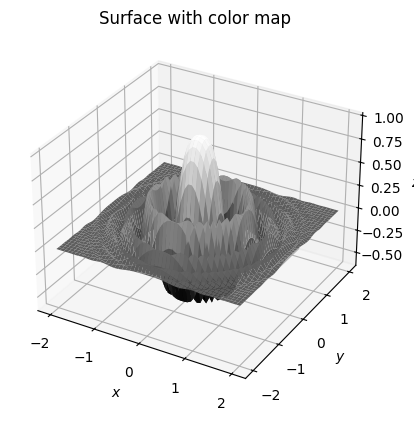

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x, y, z, cmap="binary_r")
ax.set_title(r"Surface with color map")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$");

Color maps also applied to contour plots. The darker shades of gray in the diagram correspond to the lower values of $z$.

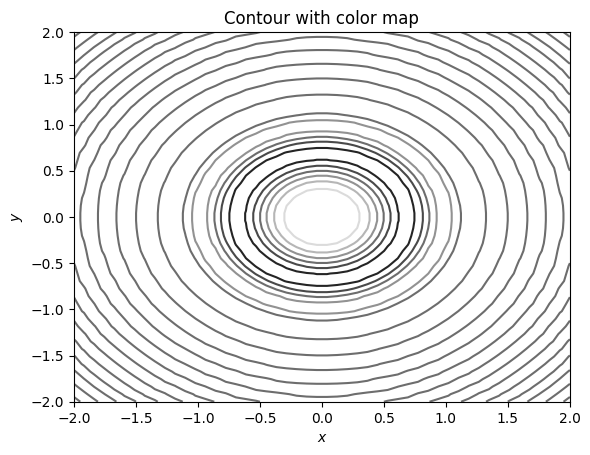

In [23]:
fig = plt.figure()
plt.contour(x, y, z, cmap="binary_r")
plt.title("Contour with color map")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$");

For more advanced uses, Matplotlib provides an interface for creating custom shading using *light sources*. This is done by importing the `LightSource` class from the `matplotlib.colors` package, and then using an instance of this class to shade the surface elements according to the $z$ value. This is done using the `shade` method on the `LightSource` object:

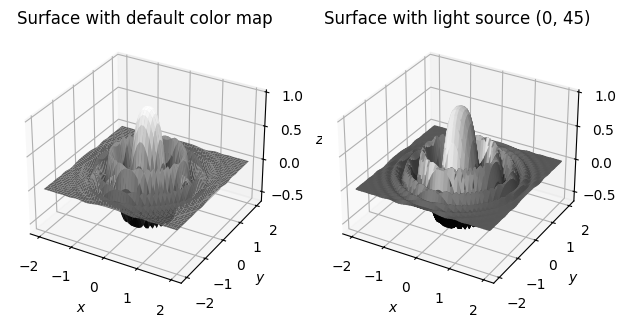

In [25]:
fig = plt.figure(tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x, y, z, cmap="binary_r")
ax1.set_title("Surface with default color map")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.set_zlabel(r"$z$")

from matplotlib.colors import LightSource
light_source = LightSource(0, 45)
vals = light_source.shade(z, plt.get_cmap("binary_r"))

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(x, y, z, facecolors=vals)
ax2.set_title("Surface with light source (0, 45)")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_zlabel(r"$z$");